In [2]:
'''
Esta celda carga las librerias necesarias para el analisis
'''
# imports
import numpy as np
import matplotlib.pyplot as plt


# Quiz 2024-11-08 GRUPO 9

- Sea $X_{n}=\{ \exp(\frac{-i}{2}): -5 < i \leq 5 \}$

    - Realizar el histograma usando cualquier método diferente a los vistos en clase (Sturges, Rice, Ráiz Cuadrada).
    - Analizar la distribución
    - Realizar el diagrama de puntos

In [3]:
# Generar los datos
data_09 = np.round([np.exp(-i/2) for i in range(-5,6)],2)
print(data_09)
print(np.sort(data_09))

[12.18  7.39  4.48  2.72  1.65  1.    0.61  0.37  0.22  0.14  0.08]
[ 0.08  0.14  0.22  0.37  0.61  1.    1.65  2.72  4.48  7.39 12.18]


## Métodos

## Regla de Scott

Sirve para calcular el ancho $(w)$ de la clase $(k)$ y se define:

$$w = 3.49 \times s \times n^{\frac{-1}{3}}$$



Este es el número de datos -- n = 11
Este es el promedio de los datos -- media = 2.8036363636363637
Esta es la desviación estandar de los datos -- s = 3.8506500041610447
Este es el ancho de las clases -- w = 6.042665836582136
Este es el número de las clases -- k = 3


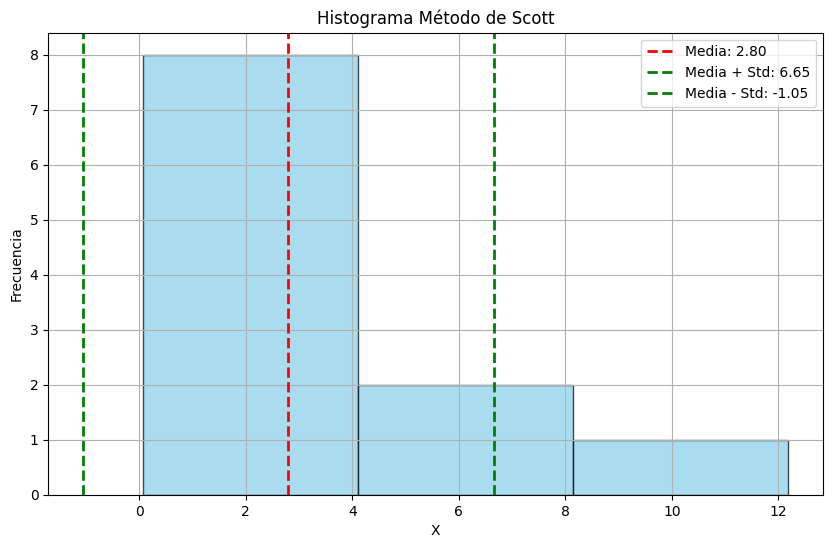

In [4]:
# Regla de scott

# Parámetros
n_09 = len(data_09)
print("Este es el número de datos -- n = {}".format(n_09))

mean_09 = np.sum(data_09)/n_09
print("Este es el promedio de los datos -- media = {}".format(mean_09))

std_09 = (np.sum((data_09 - mean_09)**2)/(n_09-1))**0.5
print("Esta es la desviación estandar de los datos -- s = {}".format(std_09))

w_09 = 3.49 * std_09 * n_09**(-1/3)
print("Este es el ancho de las clases -- w = {}".format(w_09))

k_09 = int(np.ceil((np.max(data_09) - np.min(data_09))/w_09))
print("Este es el número de las clases -- k = {}".format(k_09))


# Histograma método de Scott
plt.figure(figsize=(10, 6))
plt.hist(data_09, bins = k_09, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_09, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_09:.2f}')
plt.axvline(mean_09 + std_09, color='green', linestyle='--', linewidth=2, label=f'Media + Std: {mean_09 + std_09:.2f}')
plt.axvline(mean_09 - std_09, color='green', linestyle='--', linewidth=2, label=f'Media - Std: {mean_09 - std_09:.2f}')
plt.title('Histograma Método de Scott')
plt.xlabel('X')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)


## Freedman–Diaconis rule

Sirve para calcular el ancho $(w)$ de la clase $(k)$ y se define:

$$w = 2\times IQR \times n^{\frac{-1}{3}}$$



In [5]:
# Función para ilustrar los percentiles. No es óptima en datasets grandes
def perc_data(array,value):
    '''
    value: float (0,100)
    array: np.array
    return: np.array
    '''
    sorted_data = array
    n = len(array)
    empty_list = []
    value = value/100

    for i in range(n):
        # Esto cuenta los datos que son menores o iguales que x_i
        count_greater_equal = np.sum(np.greater_equal(sorted_data[i], sorted_data))

        # Esto cuenta los datos que son mayores o iguales que x_i
        count_less_equal = np.sum(np.less_equal(sorted_data[i], sorted_data))

        # La condición dice que la cantidad de datos menores o iguales a
        # x_i deber ser al menos n*p
        # La condicioón dice que la cantidad de datos que son mayores o iguales
        # que x_i deber ser al menos n*(1-p)

        if count_greater_equal >= n*value and count_less_equal >= n*(1-value):
            empty_list.append(sorted_data[i])
    return np.array(empty_list)



Este es el primer cuartil -- Q1 = 0.22
Este es el tercer cuartil -- Q3 = 4.48
Este es el rango intercuartil -- IQR = 4.260000000000001
Este es el ancho de las clases -- w = 3.8309695469526313
Este es el número de las clases -- k = 4


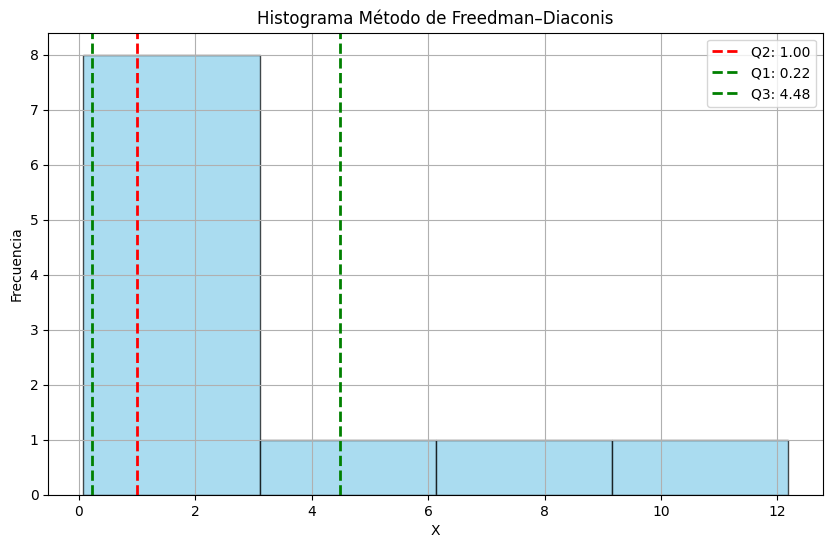

In [9]:
# Regla Freedman–Diaconis rule
Q1_09 = perc_data(array=data_09,value=25)[0] if len(perc_data(array=data_09,value=25)) == 0 else np.mean(perc_data(array=data_09,value=25))
Q2_09 = perc_data(array=data_09,value=50)[0] if len(perc_data(array=data_09,value=50)) == 0 else np.mean(perc_data(array=data_09,value=50))
Q3_09 = perc_data(array=data_09,value=75)[0] if len(perc_data(array=data_09,value=75)) == 0 else np.mean(perc_data(array=data_09,value=75))
IQR_09 = Q3_09 - Q1_09
w_09_f = 2*IQR_09*n_09**(-1/3)
k_09_f = int(np.ceil((np.max(data_09) - np.min(data_09))/w_09_f))
print("Este es el primer cuartil -- Q1 = {}".format(Q1_09))
print("Este es el tercer cuartil -- Q3 = {}".format(Q3_09))
print("Este es el rango intercuartil -- IQR = {}".format(IQR_09))
print("Este es el ancho de las clases -- w = {}".format(w_09_f))
print("Este es el número de las clases -- k = {}".format(k_09_f))

# Histograma método de Freedman–Diaconis
plt.figure(figsize=(10, 6))
plt.hist(data_09, bins = k_09_f, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(Q2_09, color='red', linestyle='--', linewidth=2, label=f'Q2: {Q2_09:.2f}')
plt.axvline(Q1_09, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1_09:.2f}')
plt.axvline(Q3_09, color='green', linestyle='--', linewidth=2, label=f'Q3: {Q3_09:.2f}')
plt.title('Histograma Método de Freedman–Diaconis')
plt.xlabel('X')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)

# Diagrama de puntos

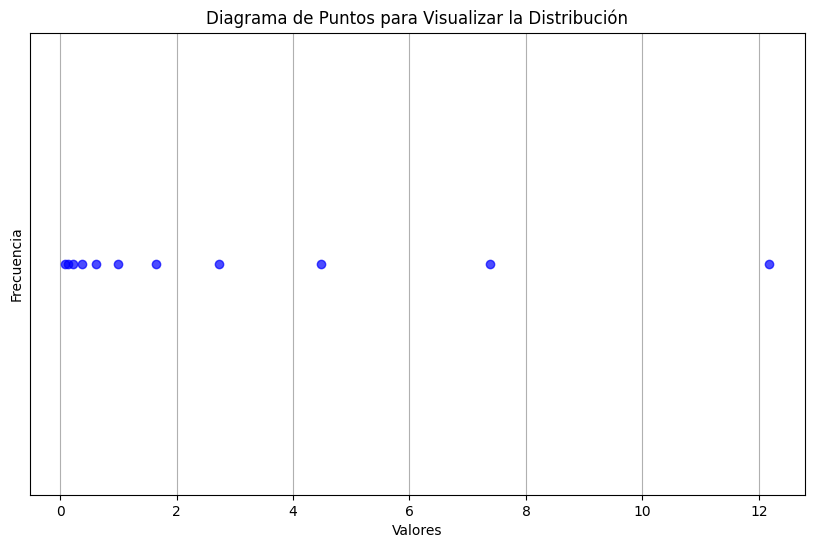

In [8]:
# Crear un diagrama de puntos para visualizar la distribución
plt.figure(figsize=(10, 6))
plt.plot(data_09, np.zeros_like(data_09), 'o', color='blue', alpha=0.7)
plt.title('Diagrama de Puntos para Visualizar la Distribución')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.yticks([])  # Ocultar el eje Y para centrarse en la distribución
plt.grid(True)
plt.show()